## MNSIT에서 제공하는 옷 종류 분류 예제

손글씨는 너무 지루하니까, 이번에는 제대로 된 이미지를 분류해보자

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

이 역시 Keras 에서 기본으로 제공하는 데이터 셋이므로, `tf.keras.datasets` 를 통해서 불러올 수 있다.

In [2]:
datasets = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) =  datasets.load_data()

In [3]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


샘플로 몇개의 이미지만 그려보자, shape을 통해서 알 수 있겠지만, 데이터는 총 6만개의 학습(Train) 데이터와, 1만개의 테스트 데이터로 이루어져 있다. 이미지 사이즈는 손글씨와 마찬가지로 28*28 픽셀로 이루어져있다. 

9


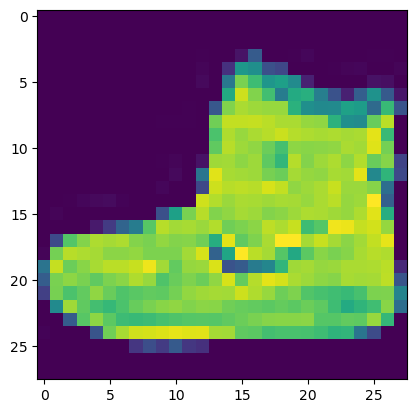

0


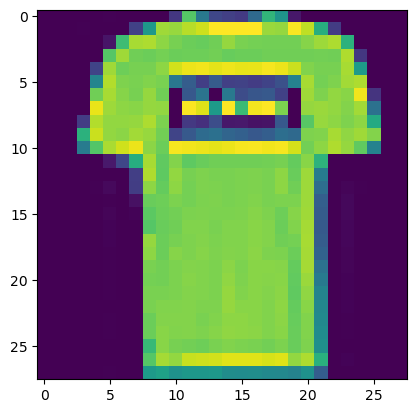

0


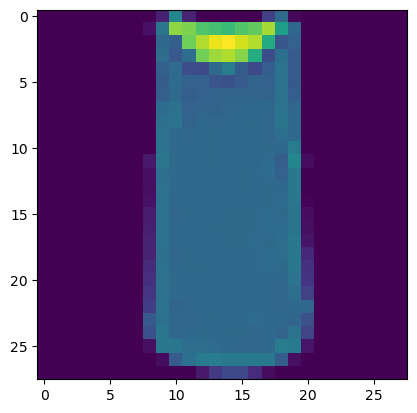

In [4]:
for i in range(3):
    print(y_train[i])
    plt.imshow(x_train[i])
    plt.show()


출력되는 y값이 별도로 문자열로 나와있지 않다. (단순히 0~9까지의 번호만 매겨져있다.) 이를 실제 이름으로 맵핑하기 위해서 찾아보면 다음과 같은 정보를 확인할 수 있다.

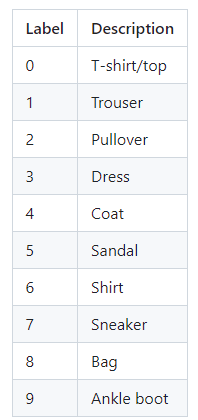

출처 : https://github.com/zalandoresearch/fashion-mnist

나중에 답을 쉽게 맞춰보기 위해서 이를 별도의 이름 문자열로 만들어둔다 

In [5]:
y_lable = [ "티셔츠/탑", "바지", "스웨터", "드레스", "코트", "샌들", "셔츠", "스니커즈", "가방", "앵클부츠"]

딥러닝을 통해 학습시키기 전에 몇몇 전처리를 미리 해둔다. 가장 먼저 image 데이터 값을 0~255 에서 0~1 사이로 변경해주는 min-max normalizaion을 먼저 실행한다. 사실 scikit learn 의 min-max scaler 를 사용해도 되지만, 우리는 이미 최소값이 0이고, 최대값이 255임을 알고 있으므로, 그냥 간단히 255로 나눠주면 끝!

In [6]:
x_train_normalized = x_train / 255.0
x_test_normalized = x_test / 255.0

단순히 스케일만 바꿔준것이기 때문에 이미지 자체가 변경되지는 않는다. 확인해보기 위해서 출력을 해보자. 먼저 pyplot 에서는 기본적으로 폰트를 설정하지 않으면 한글이 출력되지 않기때문에 아래와 같이 한글 폰트 설정을 해준다

In [7]:
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False


한줄에 2개씩 그리면서, 왼쪽은 원래 0~255 스케일로, 오른쪽은 0~1 스케일로 그린 값을 같이 보여준다.

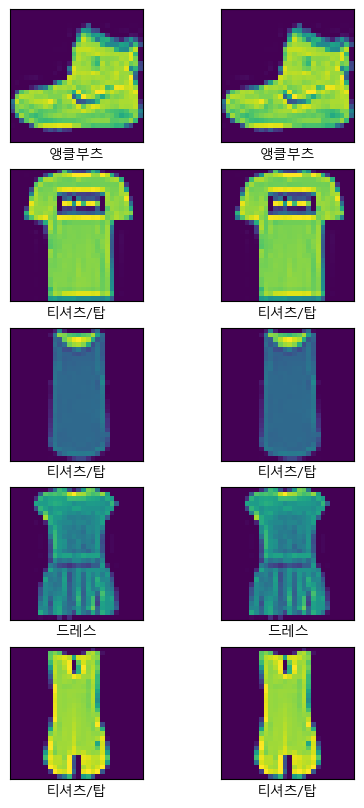

In [8]:
plt.figure(figsize=(5,10))
for i in range(5):
    plt.subplot(5, 2, i*2+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])
    plt.xlabel( y_lable[ y_train[i] ])

    plt.subplot(5, 2, i*2+2)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train_normalized[i])
    plt.xlabel( y_lable[ y_train[i] ])

    

추가적으로 신경망 모델 중 Convolution 을 하기 위해 사용할 레이어는 들어가는 입력층이 (number of image, 가로, 세로, 색) 이렇게 4차원으로 들어가는데, 우리가 가지고 있는 데이터는 흑백 데이터이므로 '색' 에 대한 차원이 없다. 이에 대해서 차원을 하나 넓혀주는 작업을 해줘야한다. (원래 이미지 데이터에서는 필요없는데, 우리가 가지고 있는 데이터가 흑백 이미지를 numpy 배열로 가지고 있어서 생기는 문제),  또한 신경망의 최종적으로 나오는 y 값 역시 다시 categorical 하게 바꿔줘야한다.

In [9]:
x_train = np.expand_dims(x_train, -1)
x_train_normalized = np.expand_dims(x_train_normalized, -1)

x_test = np.expand_dims(x_test, -1)
x_test_normalized = np.expand_dims(x_test_normalized, -1)



In [10]:
y_train_encoded = tf.keras.utils.to_categorical( y_train, num_classes=10 )
y_test_encoded = tf.keras.utils.to_categorical( y_test, num_classes=10 )

신경망 모델을 만들자

In [41]:
model = tf.keras.Sequential()

model.add( tf.keras.layers.Conv2D( 32, (3,3), activation='relu' ) )
model.add( tf.keras.layers.MaxPooling2D( (2,2) ))
model.add( tf.keras.layers.Conv2D( 64, (3,3), activation='relu' ))
model.add( tf.keras.layers.MaxPooling2D( (2,2) ))
model.add( tf.keras.layers.Conv2D( 64, (3,3), activation='relu' ))  

## 여기까지 conv 

model.add( tf.keras.layers.Flatten())
model.add( tf.keras.layers.Dense(64, activation= 'relu'))
model.add( tf.keras.layers.Dropout(0.2))
model.add( tf.keras.layers.Dense(32, activation= 'relu'))
model.add( tf.keras.layers.Dropout(0.2))
model.add( tf.keras.layers.Dense(10, activation = 'softmax') )




## 컴파일 

model.compile( optimizer='adam', 
              loss = 'crossentropy',
              metrics=['accuracy'])

In [37]:
hist = model.fit(x_train_normalized, y_train_encoded, epochs=50, validation_data=( x_test_normalized, y_test_encoded) ) 

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7224 - loss: 0.7499 - val_accuracy: 0.8648 - val_loss: 0.3836
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8732 - loss: 0.3560 - val_accuracy: 0.8763 - val_loss: 0.3398
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8953 - loss: 0.2871 - val_accuracy: 0.8925 - val_loss: 0.2942
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9054 - loss: 0.2586 - val_accuracy: 0.8923 - val_loss: 0.2913
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9156 - loss: 0.2285 - val_accuracy: 0.8976 - val_loss: 0.2773
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9238 - loss: 0.2082 - val_accuracy: 0.9042 - val_loss: 0.2725
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9280 - loss: 0.1925 - val_accuracy: 0.9111 - val_loss: 0.2652
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9338 - loss: 0.1791 - 

학습데이터 셋에 대해서는 나름 높은 정확률을 보인다. (약 95% 이상). 이제 이걸 테스트 셋에 대해서 어떻게 의사결정을 하는지 확인해보자.

먼저 test set 에 대해서 train set 과 같은 loss 와 accuracy 를 계산하기 evaluate 를 돌려본다.

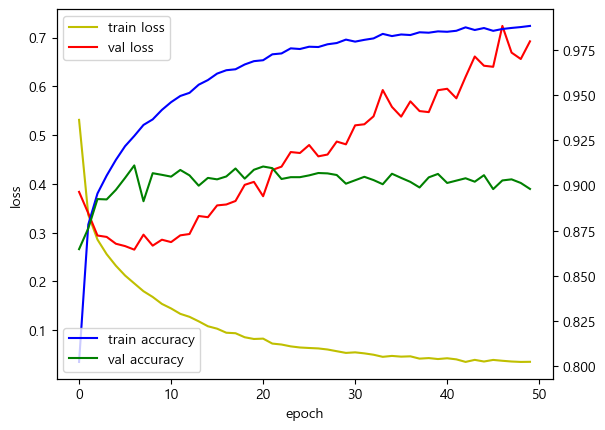

In [39]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label = 'train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label = 'val loss')
acc_ax.plot(hist.history['accuracy'], 'b', label = 'train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label = 'val accuracy')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_xlabel('accuracy')

loss_ax.legend(loc = 'upper left')
acc_ax.legend(loc = 'lower left')

plt.show()

In [40]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (32, 26, 26, 32)            │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (32, 13, 13, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (32, 11, 11, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (32, 5, 5, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (32, 3, 3, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (32, 576)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (32, 64)                    │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (32, 32)                    │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (32, 10)                    │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 285,248 (1.09 MB)

 Trainable params: 95,082 (371.41 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 190,166 (742.84 KB)

In [23]:
model.evaluate(x_test_normalized, y_test_encoded)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8627 - loss: 0.3928


[0.38607877492904663, 0.864300012588501]

정확도는 90% 로, 학습 데이터셋에 비해 약 5%정도 낮게 나온다. 이는 과적합(overfitting)으로 기인했을 가능성이 크며, 이를 막기 위해서 ealry stopping 테크닉, 또는 dropoff 테크닉등을 고려할 수 있다.

예측한 모델이 어떻게 결정되었는 지를 보기 위해서 실제 데이터 셋의 predict 한 결과를 확인해보자


In [24]:
predicted_result = model.predict(x_test_normalized)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


이렇게 `model.predict()` 를 실행시키면 모델에 데이터를 넣은 최종결과를 뱉는다. 우리는 최종 값이 dense(10) 을 걸쳐서 나온 값에 softmax를 취한 값이므로, 일종의 확률 값으로 해석할 수 있다.

예를 들어, 첫번째 예측의 경우

In [25]:
predicted_result[0]

array([5.0275219e-05, 6.8578505e-05, 1.3704273e-05, 1.2362322e-06,
       2.9666810e-06, 1.3373767e-03, 3.1725758e-05, 3.5282165e-02,
       2.8367900e-05, 9.6318364e-01], dtype=float32)

10개의 항목('티셔츠', '샌들' 등등)에 해당하는 모델의 확률값이다. 우리는 이 중에서 가장 높은 값 (argmax) 를 그 항목이라고 취해서 accuracy 를 계산하는 것이며, 이를 좀 더 시각적으로 나타내기 위해 그래프를 그려 시각화를 해보자

In [96]:
def draw_img( predicted_array, groud_truth, img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img)

    model_ans = np.argmax(predicted_array)

    if groud_truth == model_ans:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("ANS = {} {:2.0f}% (GT = {})".format(y_lable[model_ans],
                                100*np.max(predicted_array),
                                y_lable[groud_truth]),
                                color=color)
    

def draw_graph( predicted_array, ground_truth):
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])

    thisplot = plt.bar(range(10), predicted_array, color='black')
    plt.ylim([0,1])

    thisplot[ground_truth].set_color('blue')



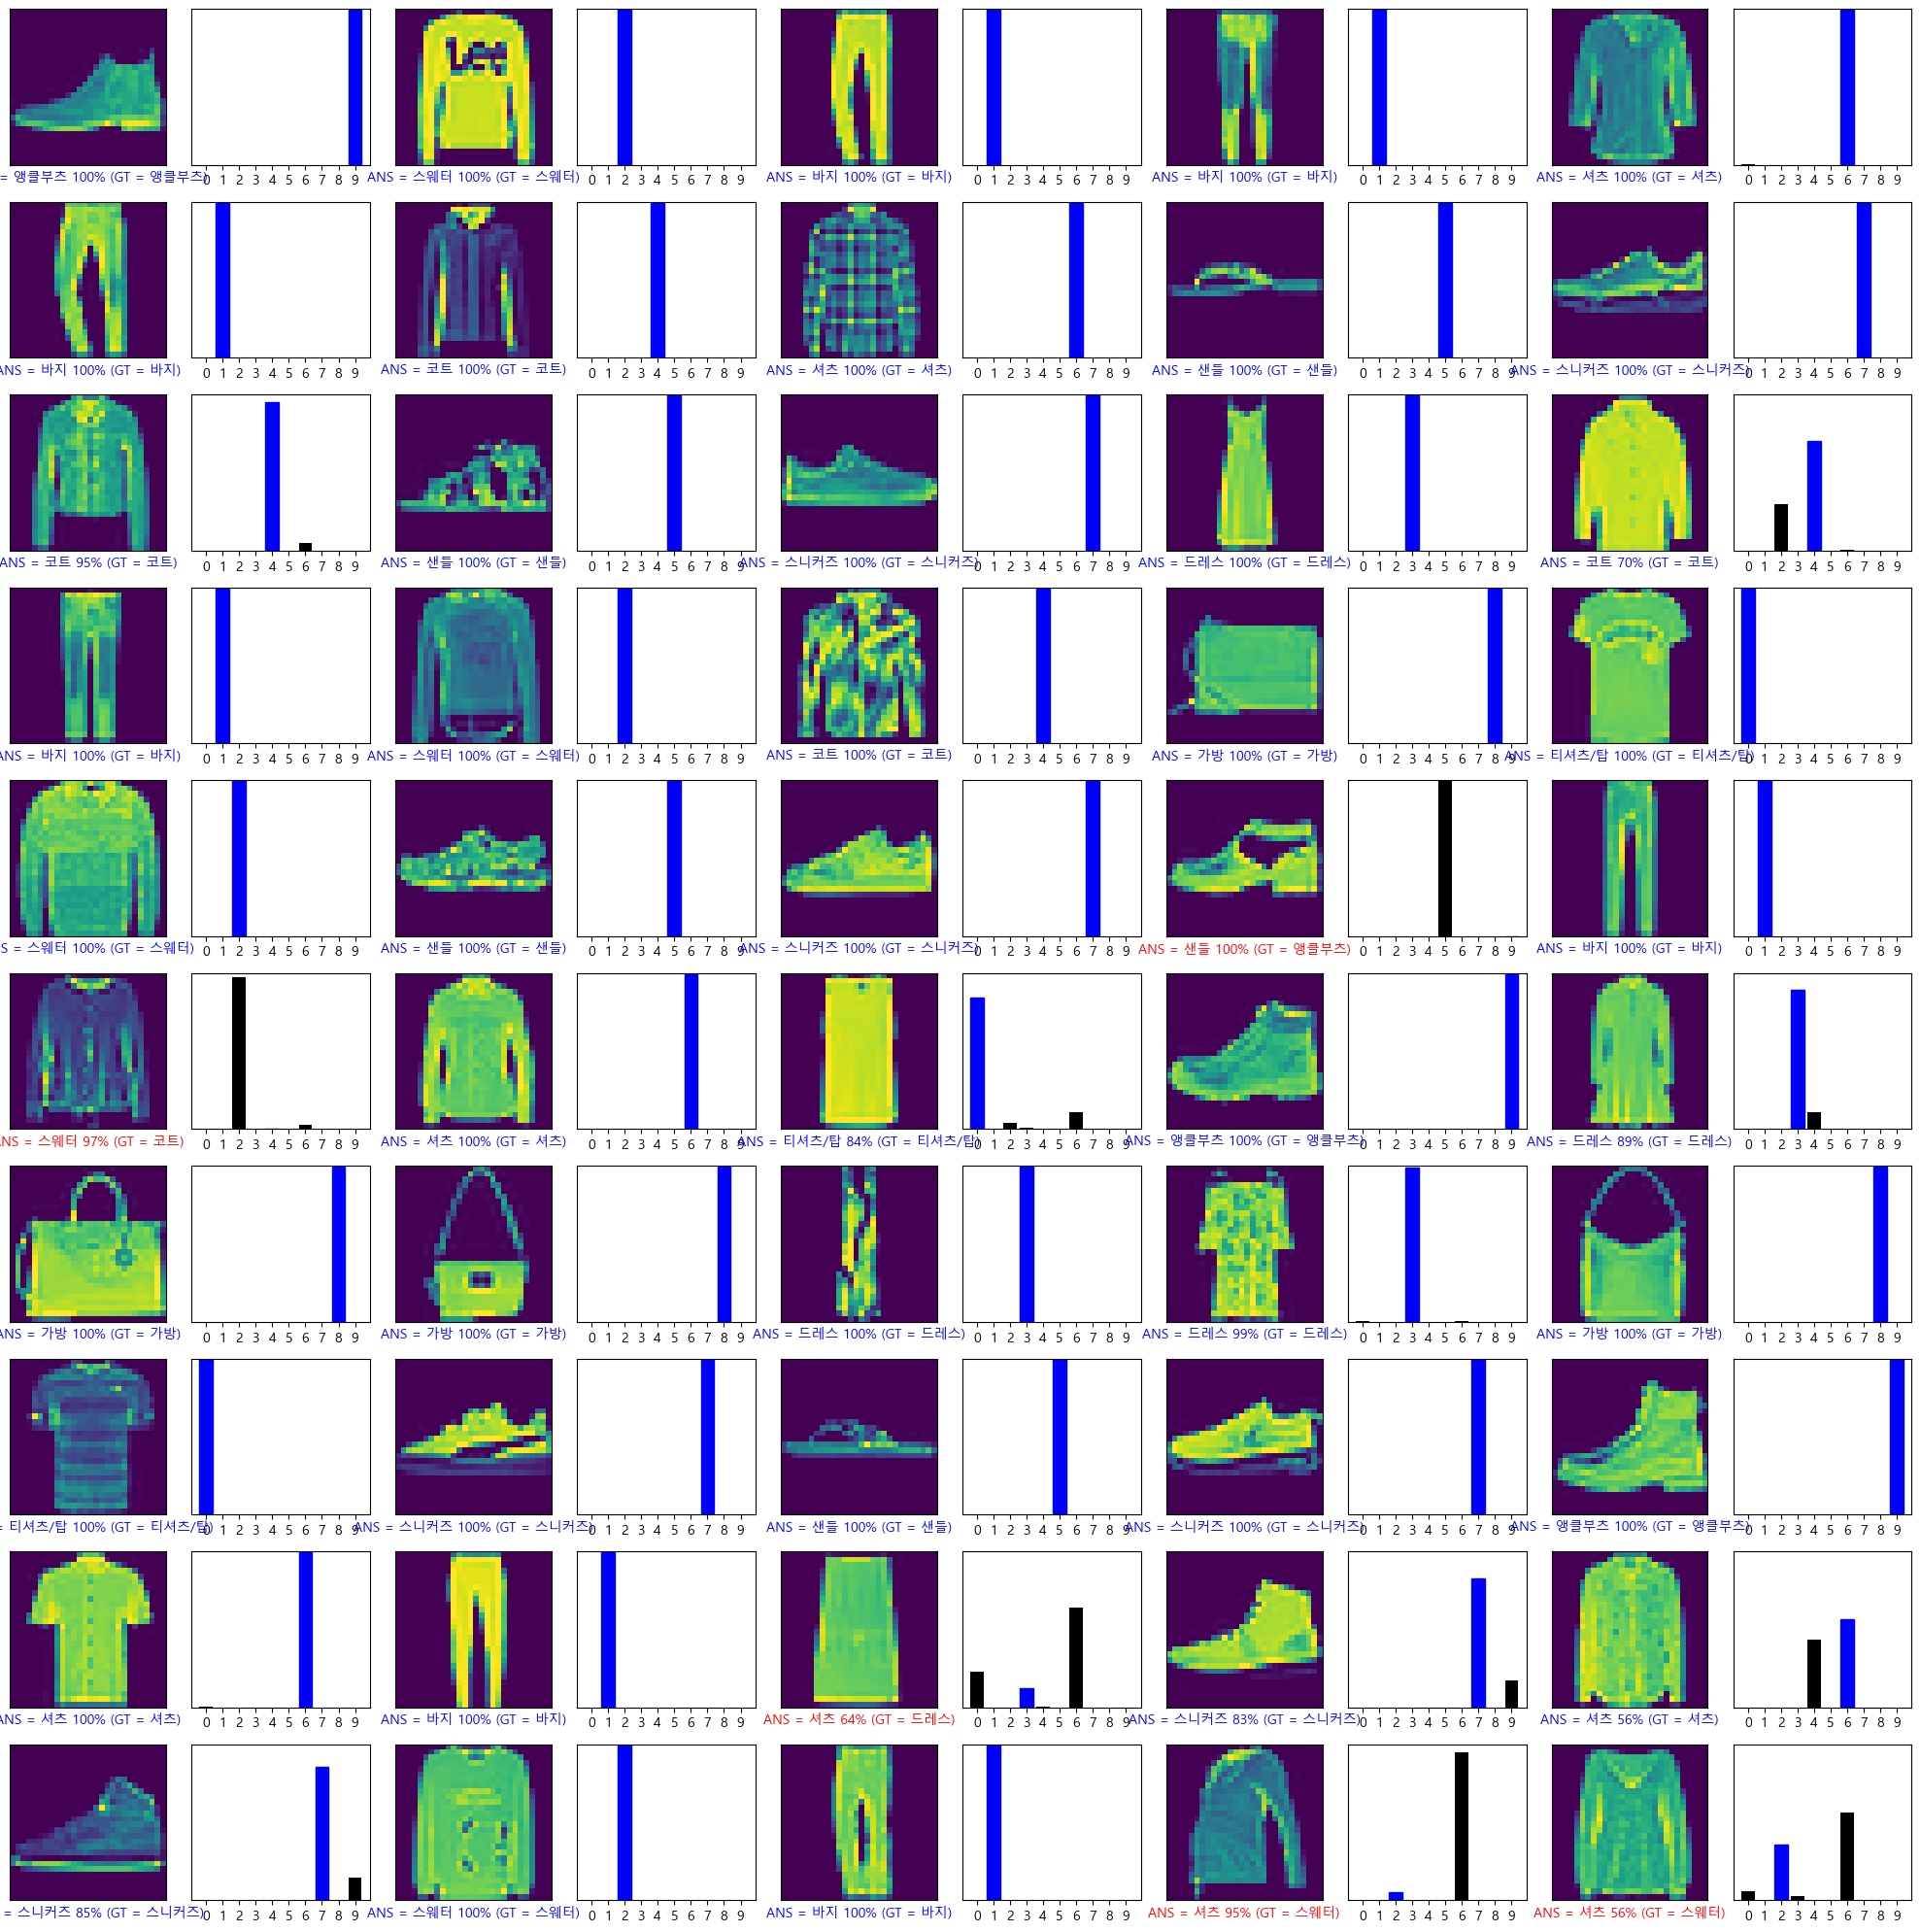

In [103]:
num_rows = 10
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  draw_img( predicted_result[i], y_test[i], x_test[i])
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  draw_graph( predicted_result[i], y_test[i])
plt.tight_layout()
plt.show()